In [1]:
import numpy as np
from scipy.integrate import odeint
from matplotlib import pyplot as plt
%matplotlib inline

### Problem 1

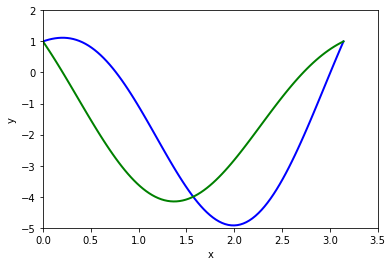

Blue  : t0 = 0 , t1 = 1
Green : t0 = 0 , t1 = -1


In [2]:
# Find t function
def find_t(f,a,b,alpha,beta,t0,t1,maxI) :
    sol1 = 0
    i=0
    while abs(sol1-beta) > 10**-8 and i < maxI :
        sol0 = odeint(f, np.array([alpha,t0]), [a,b], atol=1e-10)[1,0]
        sol1 = odeint(f, np.array([alpha,t1]), [a,b], atol=1e-10)[1,0]
        t2 = t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)
        t0 = t1
        t1=t2
        i = i+1
    if i == maxI :
        print("t not found")
    return t2

# Solve Secant
def solveSecant(f,X,a,b,alpha,beta,t0,t1,maxI) :
    t = find_t(f,a,b,alpha,beta,t0,t1,maxI)
    sol = odeint(f,np.array([alpha,t]), X,atol=1e-10)[:,0]
    return sol

def ode(y,x) :
    return np.array([y[1], -4*y[0]-9*np.sin(x)])

guess1 = np.array([0,1])
guess2 = np.array([0,-1])
X = np.linspace(0,np.pi,100)
Y1 = solveSecant(ode,X,0,np.pi,1,1,guess1[0],guess1[1],40)
Y2 = solveSecant(ode,X,0,np.pi,1,1,guess2[0],guess2[1],40)
plt.plot(X,Y1,'-b',linewidth=2)
plt.plot(X,Y2,'-g',linewidth=2)
plt.axis([0,3.5,-5,2])
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print('Blue  : t0 = 0 , t1 = 1')
print('Green : t0 = 0 , t1 = -1')

### Problem 2

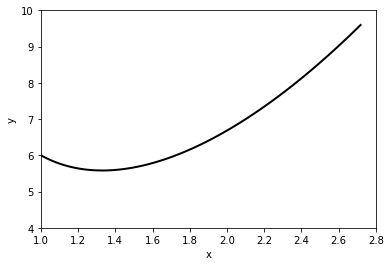

Initial Guess : 2


In [3]:
def find_t_newton(f,a,b,alpha,beta,t0,maxI) :
    sol = 0
    i=0
    while abs(sol-beta) > 10**-8 and i < maxI :
        sol = odeint(f, np.array([alpha,t0,0,1]), [a,b], atol=1e-10)
        t1 = t0 - (sol[1,0]-beta)/sol[1,3]
        t0 = t1
        i = i + 1
        sol = sol[1,0]
    if i == maxI :
        print("t not found")
    return t1

def solveNewton(f,X,alpha,beta,t0,maxI) :
    t = find_t_newton(f,X[0],X[-1],alpha,beta,t0,maxI)
    sol = odeint(f,np.array([alpha,t,0,1]), X, atol=1e-10)[:,0]
    return sol

def odez(y,x) :
    return np.array([y[1] , 2*y[0]/x**2 , y[3] , 2/x**2*y[2]])

#guess = (np.exp(2) + 6*(1/np.exp(1) - 1)) / (np.exp(1) - 1)
guess = 2
X = np.linspace(1,np.exp(1),100)
Y = solveNewton(odez,X,6,np.exp(2)+6/np.exp(1),guess,40)
plt.plot(X,Y,'-k',linewidth=2)
plt.axis([1.,2.8,4,10])
plt.xlabel('x')
plt.ylabel('y')
plt.show()
print('Initial Guess : ' + str(guess))

### Problem 3

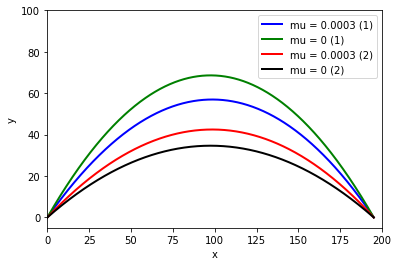

In [7]:
mu1 = 0.0003
mu2 = 0
g = 9.8067

def find_t_cannon(f,a,b,alpha,beta,t0,t1,maxI) :
    sol1 = 2
    i=0
    while abs(sol1-beta) > 10**-8 and i < maxI :
        sol0 = odeint(f, np.array([alpha,45,t0]), [a,b], atol=1e-10)[1,0]
        sol1 = odeint(f, np.array([alpha,45,t1]), [a,b], atol=1e-10)[1,0]
        t2 = t1 - (sol1 - beta)*(t1-t0)/(sol1-sol0)
        t0 = t1
        t1=t2
        i = i+1
    if i == maxI :
        print("t not found")
    return t2

# Solve Secant
def solveSecant_cannon(f,X,a,b,alpha,beta,t0,t1,maxI) :
    t = find_t_cannon(f,a,b,alpha,beta,t0,t1,maxI)
    sol = odeint(f,np.array([alpha,45,t]), X,atol=1e-10)[:,0]
    return sol

def ode_cannon_1(y,x) :
    return np.array([np.tan(y[2]) , -(g*np.sin(y[2])+mu1*y[1]**2)/(y[1]*np.cos(y[2])) , -g/y[1]**2 ])

def ode_cannon_2(y,x) :
    return np.array([np.tan(y[2]) , -(g*np.sin(y[2])+mu2*y[1]**2)/(y[1]*np.cos(y[2])) , -g/y[1]**2 ])

guess1 = np.array([np.pi/3,(np.pi+1)/3])
guess2 = np.array([(np.pi-1)/3,(np.pi)/4])
X = np.linspace(0,195,1000)
Y1 = solveSecant_cannon(ode_cannon_1,X,0,195,0,0,guess1[0],guess1[1],40)
Y2 = solveSecant_cannon(ode_cannon_2,X,0,195,0,0,guess1[0],guess1[1],40)
Y3 = solveSecant_cannon(ode_cannon_1,X,0,195,0,0,guess2[0],guess2[1],40)
Y4 = solveSecant_cannon(ode_cannon_2,X,0,195,0,0,guess2[0],guess2[1],40)
plt.plot(X,Y1,'-b',linewidth=2,label='mu = 0.0003 (1)')
plt.plot(X,Y2,'-g',linewidth=2,label='mu = 0 (1)')
plt.plot(X,Y3,'-r',linewidth=2,label='mu = 0.0003 (2)')
plt.plot(X,Y4,'-k',linewidth=2,label='mu = 0 (2)')
plt.legend(loc=1)
plt.axis([0,200,-5,100])
plt.xlabel('x')
plt.ylabel('y')
plt.show()